# Pandas Plot

In [1]:
import pandas as pd
from pandas import Series
from pandas import Grouper   #TimeGrouper deprecated
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import datasets
from matplotlib.font_manager import FontProperties
matplotlib.style.use('ggplot')
%matplotlib inline

pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', None)

### Dataset
The units are in degrees Celsius and there are 3,650 observations. The source of the data is credited as the Australian Bureau of Meteorology.

Download the dataset from (https://datamarket.com/data/set/2324/daily-minimum-temperatures-in-melbourne-australia-1981-1990#!ds=2324&display=line&s=4fz&e=561)
and place it in the current working directory with the filename `daily-minimum-temperatures.csv`

If using Azure, follow instructions here https://notebooks.azure.com/faq for loading data into noteboook

#### http://machinelearningmastery.com/time-series-data-visualization-with-python/

In [2]:
df = pd.read_csv('daily-minimum-temperatures-in-me.csv')
df.columns=['Date', 'Temperature']
df.set_index(df['Date'], inplace=True)
series = df['Temperature']

series = pd.to_numeric(series, errors='coerce')  #If ‘coerce’, then invalid parsing will be set as NaN
series.index = pd.DatetimeIndex(series.index)
idx = pd.date_range('1981-01-01', '1990-12-31')
series = series.reindex(idx, fill_value=0)
series.fillna(method='ffill', inplace=True)

### Line plots

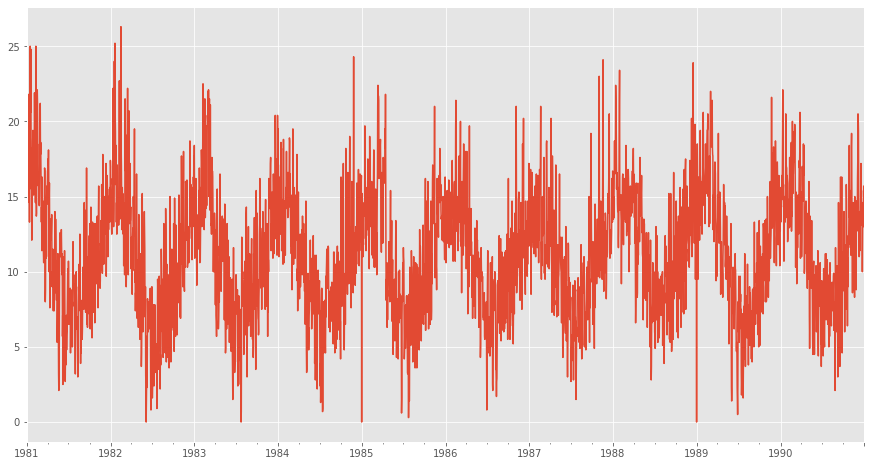

In [3]:
series.plot(figsize=(15,8))
plt.show()

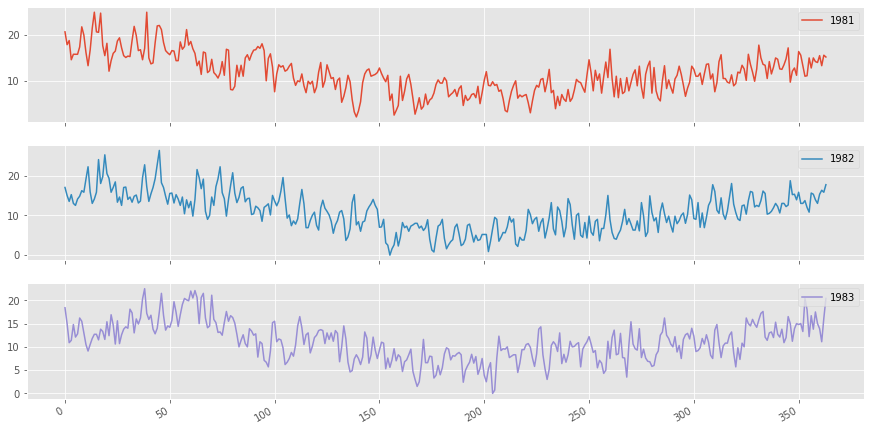

In [4]:
## Mutiple plots
## The Minimum Daily Temperatures dataset spans 10 years.
## We can group data by year and create a line plot for each year for direct comparison
groups = series.groupby(pd.Grouper(freq='A'))   #A: group by year, M: group by month, ..
years = pd.DataFrame()
for name, group in groups:
    #Choose onle first 365 days to line up leap years
    years[name.year] = group.values[0:364]
    
ax = years[[1981, 1982, 1983]].plot(figsize=(15,8), subplots=True, legend=False)
for a in ax:
    patches, labels = a.get_legend_handles_labels()
    a.legend(patches, labels, loc='upper right')
plt.show()


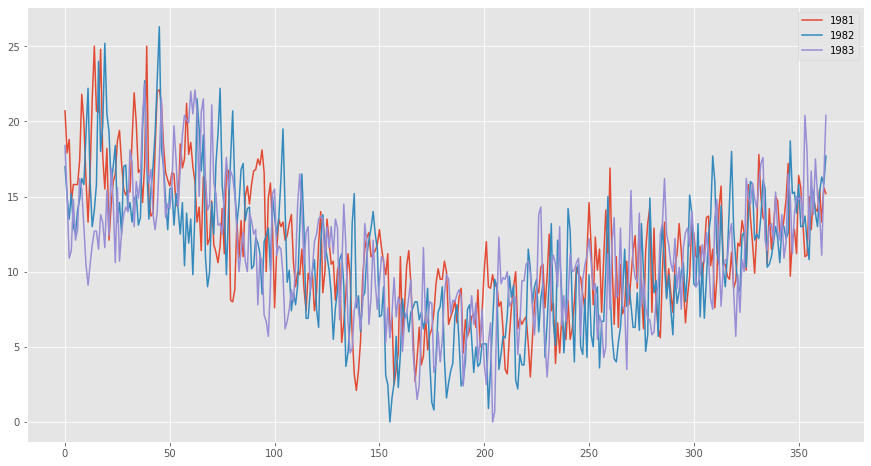

In [5]:
# Messy line graph in single plot
ax =years[[1981, 1982, 1983]].plot(kind='line', legend=False , figsize=(15,8))
patches, labels = ax.get_legend_handles_labels()
ax.legend(patches, labels, loc='upper right')

## Heat maps

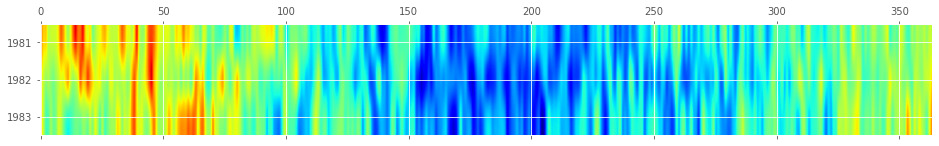

In [6]:
plt.matshow( years[[1981, 1982, 1983]].T, interpolation='gaussian', aspect='auto', cmap='jet');
plt.yticks(np.arange(len(years[[1981, 1982, 1983]].columns)), years[[1981, 1982, 1983]].columns);


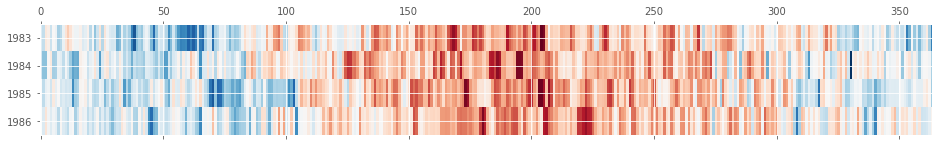

In [7]:
plt.matshow( years[[1983, 1984, 1985,1986]].T, interpolation='nearest', aspect='auto', cmap='RdBu');
plt.yticks(np.arange(len(years[[1983, 1984, 1985,1986]].columns)), years[[1983, 1984, 1985,1986]].columns);


## Area Charts

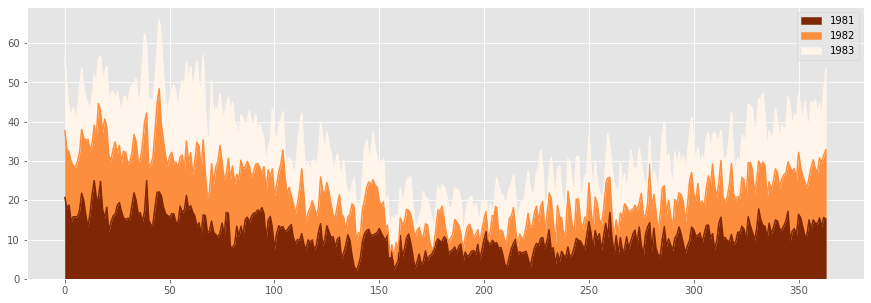

In [8]:
# Messy line graph in single plot

ax =years[[1981, 1982, 1983]].plot(kind='area', legend=False, figsize=(15,5), cmap='Oranges_r')
patches, labels = ax.get_legend_handles_labels();
ax.legend(patches, labels, loc='upper right');

#for more colormaps: https://matplotlib.org/examples/color/colormaps_reference.html
#add _r to the name to reverse colors